# Developing a visualization to monitor energy comsumption 

### Data for the project can be found in the UCI Machine Learning Repository located here:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

#### Data description (after clean-up)

1.date-time: Datetime in format yyyy-mm-dd hh:mm:ss 

2.global_active_power: household global minute-averaged active power (in kilowatt) 

3.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 

4.voltage: minute-averaged voltage (in volt) 

5.global_intensity: household global minute-averaged current intensity (in ampere) 

6.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 

7.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 

8.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

In [59]:
# Additional modules
import numpy as np
import pandas as pd
from datetime import datetime
import time
from datasci_prj.dayofweek import dayofweek #This function returns the day of week in text
from datasci_prj.monthofyear import monthofyear #This function returns the day of week in text

In [95]:
# Read the datasets and append
df1 = pd.read_csv('household_power_consumption_set_1.csv', 
                   sep=',',header=0,low_memory=False)
df2 = pd.read_csv('household_power_consumption_set_2.csv', 
                   sep=',',header=0,low_memory=False)
df3 = pd.read_csv('household_power_consumption_set_3.csv', 
                   sep=',',header=0,low_memory=False)
df = df1.append(df2.append(df3))
df = df.reset_index(drop=True)
df['Datetime']=pd.to_datetime(df['Datetime'])


In [96]:
entry1 = df.Datetime[0]
print 'The first entry of this dataset begins on'+\
      ' '+dayofweek(entry1.weekday())+', ' +\
          monthofyear(entry1.month)+' '+ str(entry1.day)+\
      ', '+str(entry1.year) 
print 'at', entry1.time()

The first entry of this dataset begins on Saturday, December 16, 2006
at 17:24:00


### Plot out one day's global active power usage

In [102]:
# This is on Boxing day of 2006 
df4 = df[ (df['Datetime'] > datetime(2006,12,25,0,0,0) ) 
        &  (df['Datetime'] < datetime(2006,12,26,0,0,0) ) ]

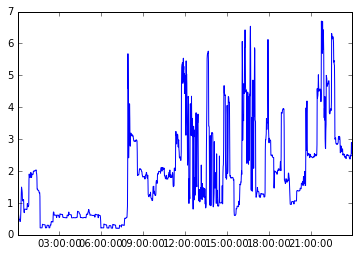

In [103]:
plt.plot(df4.Datetime.tolist(), df4.Global_active_power)